In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Dropout
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import img_to_array
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image
import cv2
import os
%matplotlib inline

In [2]:
!pip install opendatasets --upgrade

In [3]:
# import opendatasets as od
# dataset_url = 'https://www.kaggle.com/datasets/ashwingupta3012/human-faces'
# od.download(dataset_url)

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code


In [5]:
size = 256
epochs = 50
no_images = 5000
dataset_path = "/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code/human-faces/Humans"
test_path = "/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code/Test"

In [6]:
np.random.seed(42)

In [7]:
img_data = []
dataset_path = '/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code/Celebrity Faces Dataset/'
for files in os.listdir(path=dataset_path):
  for image in os.listdir(path= dataset_path + files):
      image = '/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code/Celebrity Faces Dataset/{}/{}'.format(files, image)
      img = cv2.imread(image)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (size, size))
      img_data.append(img_to_array(img))
      if len(img_data)>=no_images:
        break

untrained_img_data = []
for image in os.listdir(path=test_path):
    image = test_path+'/'+image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size))
    untrained_img_data.append(img_to_array(img))

print("Imported {} images for training".format(len(img_data)))


Imported 1800 images for training


In [8]:
# img_data = []
# for image in os.listdir(path=dataset_path):
#     image = dataset_path+'/'+image
#     img = cv2.imread(image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, (size, size))
#     img_data.append(img_to_array(img))

# print("Imported {} images for training".format(len(img_data)))

In [9]:
img_array = np.reshape(img_data, (len(img_data), size, size, 3))
img_array = img_array.astype('float32')/255.

untrained_img_array = np.reshape(untrained_img_data, (len(untrained_img_data), size, size, 3))
untrained_img_array = untrained_img_array.astype('float32')/255.

In [10]:
# model = Sequential()
# model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2, input_shape=(size, size, 3)))
# # model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(64, (3,3), activation='relu', strides=2, padding='same'))
# # model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(32, (3,3), activation='relu', strides=2, padding='same'))
# # model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(16, (3,3), activation='relu', strides=2, padding='same'))
# # model.add(MaxPooling2D((2,2), padding='same'))

# # model.add(Conv2D(4, (3,3), activation='relu', padding='same'))
# # model.add(UpSampling2D((2,2)))
# model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(size, size, 3)))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#----------------------------------------------------------------------------------------------------------------------
latent_channels = 64
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2, input_shape=(size, size, 3)))
model.add(Dropout(0.2))
# model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', strides=2, padding='same'))
model.add(Dropout(0.2))
# model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(latent_channels, (3,3), activation='relu', strides=2, padding='same'))
# model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(4, (3,3), activation='relu', strides=2, padding='same'))
# model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(4, (3,3), activation='relu', strides=2, padding='same'))
model.layers[-1]._name = "latent_space"

# model.add(Conv2D(4, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 latent_space (Conv2D)       (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        9232      
                                                                 
 up_sampling2d (UpSampling2  (None, 64, 64, 16)        0

In [11]:
model.fit(img_array, img_array, epochs=epochs, shuffle=True)

Epoch 1/50
57/57 [==============================] - 21s 152ms/step - loss: 0.0398 - accuracy: 0.5729
Epoch 2/50
57/57 [==============================] - 8s 140ms/step - loss: 0.0111 - accuracy: 0.7048
Epoch 3/50
57/57 [==============================] - 8s 138ms/step - loss: 0.0069 - accuracy: 0.7875
Epoch 4/50
57/57 [==============================] - 8s 143ms/step - loss: 0.0059 - accuracy: 0.8017
Epoch 5/50
57/57 [==============================] - 8s 142ms/step - loss: 0.0054 - accuracy: 0.8089
Epoch 6/50
57/57 [==============================] - 8s 145ms/step - loss: 0.0050 - accuracy: 0.8130
Epoch 7/50
57/57 [==============================] - 8s 140ms/step - loss: 0.0046 - accuracy: 0.8208
Epoch 8/50
57/57 [==============================] - 8s 145ms/step - loss: 0.0043 - accuracy: 0.8271
Epoch 9/50
57/57 [==============================] - 8s 142ms/step - loss: 0.0041 - accuracy: 0.8318
Epoch 10/50
57/57 [==============================] - 8s 145ms/step - loss: 0.0039 - accuracy: 0.832

In [12]:
pred = model.predict(untrained_img_array)

1/1 [==============================] - 0s 500ms/step


In [13]:
# plt.figure()
# f, axarr = plt.subplots(1,2)

# f.suptitle("Image reconstruction using Autoencoders")

# axarr[0].imshow(img_array[0])
# axarr[0].set_title('Orignal')
# axarr[1].imshow(pred[0])
# axarr[1].set_title('Reconstructed')

# plt.tight_layout()

for i in range(len(pred)):
    pred[i] = pred[i] / pred[i].max()
    matplotlib.image.imsave('/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code/reconstructed/gen_{}.png'.format(i), pred[i])
    # plt.imshow(pred[i])
    # plt.tight_layout()
    # plt.title(f'{i}')
    # plt.savefig('reconstructed/gen_{}.png'.format(i))
    # plt.close()

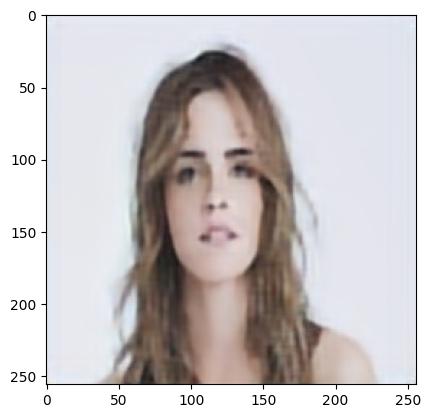

In [14]:
# pred[0] = pred[0] / pred[0].max()
plt.imshow(pred[1])

In [15]:
model.save("/content/drive/MyDrive/Documents/medicaps/Project-Work 1/Code/s{}_e{}_i{}reconstruction.model".format(size, epochs, no_images))